## Feature Selection

## 3 Feature selection techniques that are easy to use and also gives good results.

1. Univariate Selection

2. Feature Importance

3. Correlation Matrix with Heatmap

1. 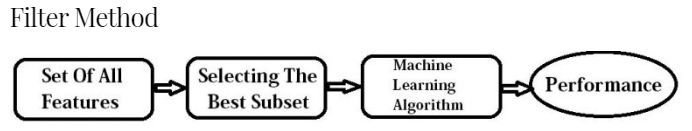

2. 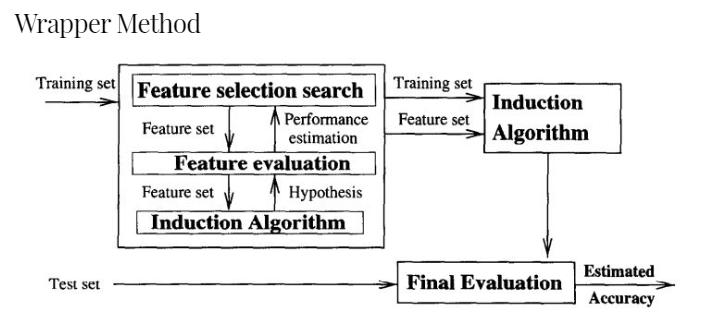


1. __Forward Selection__: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

2. __Backward Elimination__: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

3. __Recursive Feature elimination__: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

3. 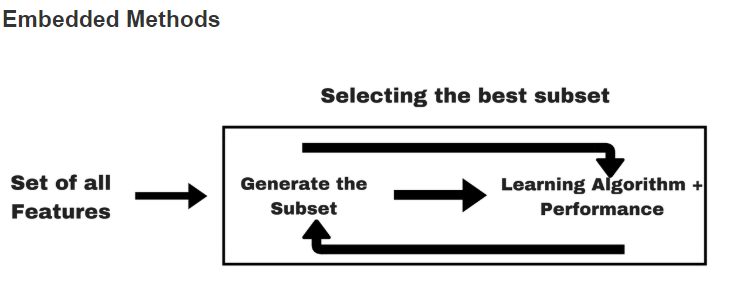

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
print (data)
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)


In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [5]:
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [6]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [8]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07357869 0.00626662 0.02850936 0.00664522 0.02595841 0.00642906
 0.03681834 0.02500712 0.03984861 0.02302903 0.03027351 0.05652848
 0.05788601 0.47395254 0.02798202 0.0295731  0.03120336 0.00601433
 0.00755289 0.00694329]


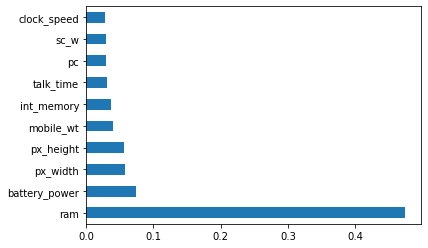

In [9]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

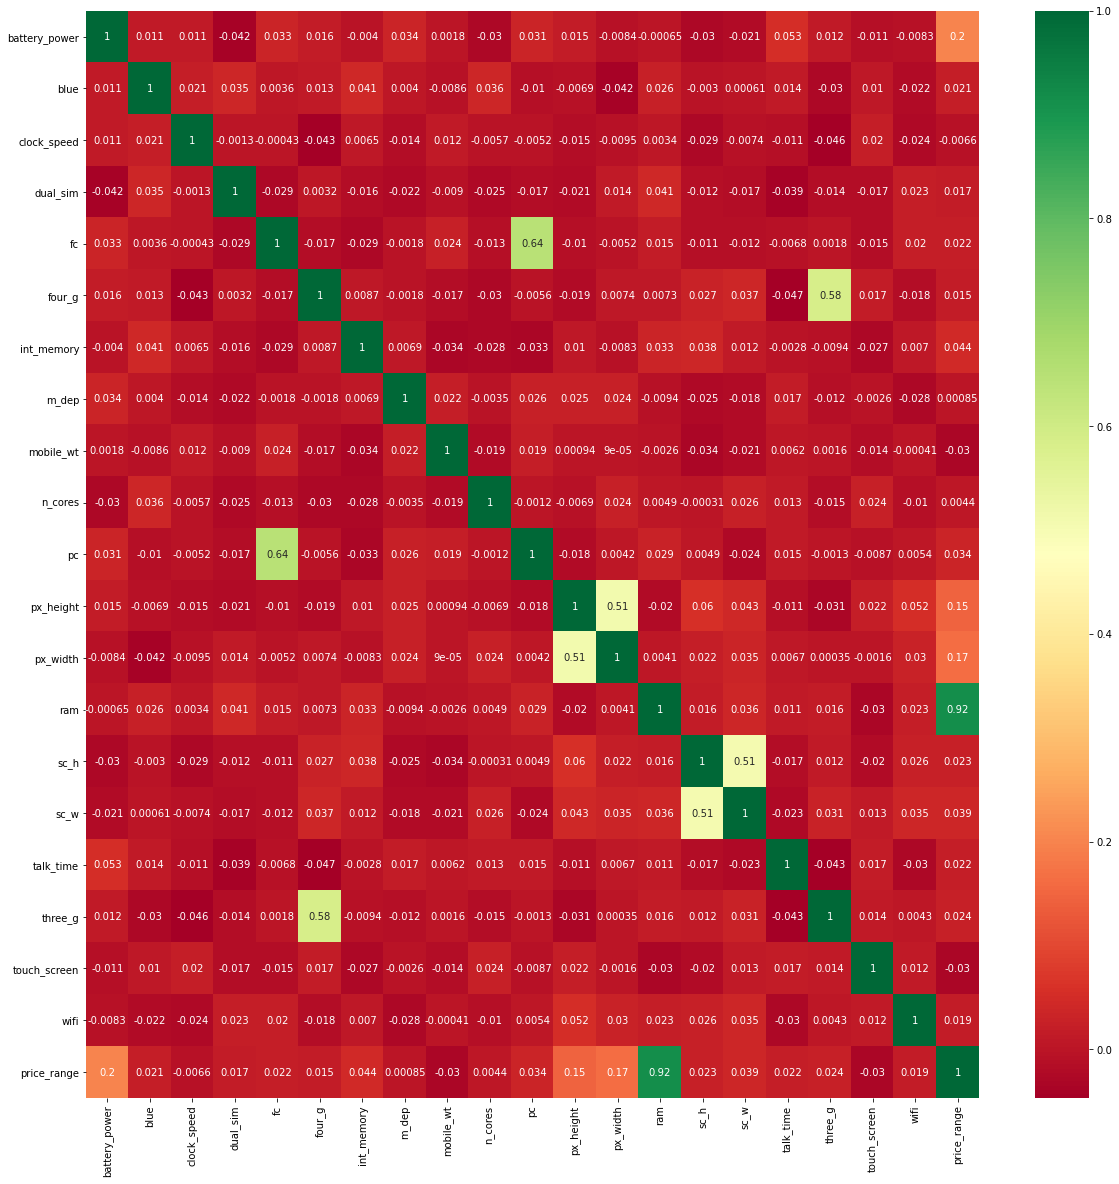

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
!pip install chefboost

In [12]:
import pandas as pd
from chefboost import Chefboost as chef
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv('golf.txt')

In [14]:
data


,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [15]:
config = {'algorithm': 'ID3'}
model = chef.fit(data, config)

[INFO]:  2 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  0.7705399990081787  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [16]:
def findDecision(obj): #obj[0]: Outlook, obj[1]: Temp., obj[2]: Humidity, obj[3]: Wind
	# {"feature": "Outlook", "instances": 14, "metric_value": 0.9403, "depth": 1}
	if obj[0] == 'Rain':
		# {"feature": "Wind", "instances": 5, "metric_value": 0.971, "depth": 2}
		if obj[3] == 'Weak':
			return 'Yes'
		elif obj[3] == 'Strong':
			return 'No'
		else: return 'No'
	elif obj[0] == 'Sunny':
		# {"feature": "Humidity", "instances": 5, "metric_value": 0.971, "depth": 2}
		if obj[2] == 'High':
			return 'No'
		elif obj[2] == 'Normal':
			return 'Yes'
		else: return 'Yes'
	elif obj[0] == 'Overcast':
		return 'Yes'
	else: return 'Yes'


In [17]:
outlook = 14 * 0.9403 - 5 * 0.971 - 5 * 0.971 
wind = 5 * 0.971
humidity = 5 * 0.971
temperature = 0


In [18]:
total = outlook + wind + humidity + temperature

In [19]:
print ('outlook = ', 100*outlook/total)
print ('wind = ', 100*wind/total)
print ('humidity = ', 100*humidity/total)
print ('temperature = ', 100*temperature/total)
       

outlook =  26.239346105346325
wind =  36.880326947326836
humidity =  36.880326947326836
temperature =  0.0


## Forward Feature Selection

In [20]:
!pip install mlxtend

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('golf_label_num.txt')
data.head()

,Outlook,Temperature,Humidity,Wind,Decision
0,1,1,1,1,1
1,1,1,1,2,1
2,2,1,1,1,2
3,3,2,1,1,2
4,3,3,2,1,2


In [23]:
data.shape

(14, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int64
 1   Temperature  14 non-null     int64
 2   Humidity     14 non-null     int64
 3   Wind         14 non-null     int64
 4   Decision     14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [25]:
data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Decision       0
dtype: int64

In [26]:
X = data.drop(['Decision'], axis=1)
y = data['Decision']

In [27]:
X.shape, y.shape

((14, 4), (14,))

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [29]:
lreg = LinearRegression()
fs = sfs(lreg, k_features=3, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [30]:
fs = fs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-08-09 19:15:33] Features: 1/3 -- score: -0.231037037037037[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-08-09 19:15:33] Features: 2/3 -- score: -0.2559591353363192[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-08-09 19:15:33] Features: 3/3 -- score: -0.30242567633645

In [31]:
feat_names = list(fs.k_feature_names_)
print(feat_names)

['Outlook', 'Temperature', 'Humidity']


In [32]:
new_data = data[feat_names]
new_data['Decision'] = data['Decision']

new_data.head()

<ipython-input-32-b2285483ad90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Decision'] = data['Decision']


,Outlook,Temperature,Humidity,Decision
0,1,1,1,1
1,1,1,1,1
2,2,1,1,2
3,3,2,1,2
4,3,3,2,2
